In [4]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
sb.set_style('darkgrid')
from tensorflow import keras
from keras.layers import Dense,Dropout,Input
from keras.models import Model
from keras.utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import os
import statistics

df = pd.read_csv('DataSET.csv')

In [5]:
df.head()

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,redshift_err,plate,mjd,fiberid,class1
0,1.240000e+18,199.939440,32.875467,18.27449,17.01069,16.39594,16.05050,15.79158,4576,301,1,532,2.360000e+18,GALAXY,0.036922,0.000011,2093,53818,66,GALAXY
1,1.240000e+18,225.937814,61.567422,18.51085,17.42787,16.94735,16.61756,16.46231,1412,301,4,290,6.880000e+17,GALAXY,0.065836,0.000008,611,52055,472,GALAXY
2,1.240000e+18,182.372228,43.312479,19.59469,19.39359,19.08492,19.01972,19.14087,3840,301,6,162,1.630000e+18,QSO,0.960348,0.000361,1450,53120,348,QSO
3,1.240000e+18,201.170118,7.124704,18.86066,17.91374,17.56237,17.26353,17.13068,3230,301,3,24,2.030000e+18,GALAXY,0.120267,0.000006,1799,53556,496,GALAXY
4,1.240000e+18,7.270341,-9.284358,19.46794,18.12656,17.43603,17.04602,16.81404,1740,301,5,70,7.350000e+17,GALAXY,0.085830,0.000014,653,52145,614,GALAXY


In [6]:
len(df)

50000

In [7]:
u = df['u']

In [8]:
o = df['objid']

In [9]:
ra = df['ra']

In [10]:
dec = df['dec']

In [11]:
g = df['g']

In [12]:
r = df['r']

In [13]:
i = df['i']

In [14]:
z = df['z']

In [15]:
c1 = df['u'] - df['g']

In [16]:
c2 = df['g'] - df['r']

In [17]:
c3 = df['r'] - df['i']

In [18]:
c4 = df['i'] - df['z']

In [19]:
run = df['run']

In [20]:
rerun = df['rerun']

In [21]:
cc = df['camcol']

In [22]:
f = df['field']

In [23]:
so = df['specobjid']

In [24]:
df['class'] = df['class'].replace(['GALAXY'],1)
df['class'] = df['class'].replace(['QSO'],0)

In [25]:
rs = df['redshift']

In [26]:
rs_err = df['redshift_err']

In [27]:
pl = df['plate']

In [28]:
mjd = df['mjd']

In [29]:
fid = df['fiberid']

In [30]:
df['class1'] = df['class1'].replace(['GALAXY'],1)
df['class1'] = df['class1'].replace(['QSO'],0)

In [31]:
sdo = np.std(o)
sdu = np.std(u)
sdra = np.std(ra)
sddec = np.std(dec)
sdg = np.std(g)
sdi = np.std(i)
sdr = np.std(r)
sdz = np.std(z)
sdrun = np.std(run)
sdrerun = np.std(rerun)
sdcc = np.std(cc)
sdf = np.std(f)
sdso = np.std(so)
sdrs = np.std(rs)
sdrs_err = np.std(rs_err)
sdpl = np.std(pl)
sdmjd = np.std(mjd)
sdfid = np.std(fid)

In [32]:
meano = statistics.mean(o)
meanu =statistics.mean(u)
meanra = statistics.mean(ra)
meandec = statistics.mean(dec)
meang = statistics.mean(g)
meani =statistics.mean(i)
meanr = statistics.mean(r)
meanz = statistics.mean(z)
meanrun = statistics.mean(run)
meanrerun = statistics.mean(rerun)
meancc = statistics.mean(cc)
meanf = statistics.mean(f)
meanso = statistics.mean(so)
meanrs = statistics.mean(rs)
meanrs_err = statistics.mean(rs_err)
meanpl = statistics.mean(pl)
meanmjd = statistics.mean(mjd)
meanfid = statistics.mean(fid)

In [33]:
upperu = meanu + 2*sdu
loweru = meanu - 2*sdu
df = df.drop(df[df['u'] < loweru].index)
df = df.drop(df[df['u'] > upperu].index)

In [34]:
upperra = meanra + 2*sdra
lowerra = meanra - 2*sdra
df = df.drop(df[df['ra'] < lowerra].index)
df = df.drop(df[df['ra'] > upperra].index)

In [35]:
upperdec = meandec + 2*sddec
lowerdec = meandec - 2*sddec
df = df.drop(df[df['dec'] < lowerdec].index)
df = df.drop(df[df['dec'] > upperdec].index)

In [36]:
upperg = meang + 2*sdg
lowerg = meang - 2*sdg
df = df.drop(df[df['g'] < lowerg].index)
df = df.drop(df[df['g'] > upperg].index)

In [37]:
upperi = meani + 2*sdi
loweri = meani - 2*sdi
df = df.drop(df[df['i'] < loweri].index)
df = df.drop(df[df['i'] > upperi].index)

In [38]:
upperr = meanr + 2*sdr
lowerr = meanr - 2*sdr
df = df.drop(df[df['r'] < lowerr].index)
df = df.drop(df[df['r'] > upperr].index)

In [39]:
upperz = meanz + 2*sdz
lowerz = meanz - 2*sdz
df = df.drop(df[df['z'] < lowerz].index)
df = df.drop(df[df['z'] > upperz].index)

In [40]:
upperrs = meanrs + 2*sdrs
lowerrs = meanrs - 2*sdrs
df = df.drop(df[df['redshift'] < lowerrs].index)
df = df.drop(df[df['redshift'] > upperrs].index)

In [41]:
upperrs_err = meanrs_err + 2*sdrs_err
lowerrs_err = meanrs_err - 2*sdrs_err
df = df.drop(df[df['redshift_err'] < lowerrs_err].index)
df = df.drop(df[df['redshift_err'] > upperrs_err].index)

In [42]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,redshift_err,plate,mjd,fiberid,class1
0,1.240000e+18,199.939440,32.875467,18.27449,17.01069,16.39594,16.05050,15.79158,4576,301,1,532,2.360000e+18,1,0.036922,0.000011,2093,53818,66,1
1,1.240000e+18,225.937814,61.567422,18.51085,17.42787,16.94735,16.61756,16.46231,1412,301,4,290,6.880000e+17,1,0.065836,0.000008,611,52055,472,1
3,1.240000e+18,201.170118,7.124704,18.86066,17.91374,17.56237,17.26353,17.13068,3230,301,3,24,2.030000e+18,1,0.120267,0.000006,1799,53556,496,1
7,1.240000e+18,219.621140,48.325923,19.38744,18.37505,17.63306,17.25172,17.00577,3918,301,6,154,1.180000e+18,1,0.180659,0.000015,1047,52733,257,1
9,1.240000e+18,207.564132,45.238058,18.38328,16.59322,15.77696,15.39790,15.08755,3699,301,4,126,1.650000e+18,1,0.040357,0.000012,1466,53083,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1.240000e+18,151.337996,54.438119,19.45398,17.71596,16.81220,16.35758,15.97816,2243,301,2,211,1.060000e+18,1,0.047551,0.000015,945,52652,134,1
49995,1.240000e+18,156.323152,4.934303,17.72143,16.39257,15.74776,15.40971,15.13828,2125,301,5,251,6.490000e+17,1,0.028488,0.000011,576,52325,341,1
49996,1.240000e+18,118.635191,28.670478,18.33770,17.17221,16.67359,16.32076,16.16934,2864,301,5,71,1.190000e+18,1,0.074360,0.000006,1060,52636,54,1
49997,1.240000e+18,120.161569,30.098111,18.49410,16.54002,15.64546,15.21821,14.89110,2864,301,5,84,9.680000e+17,1,0.046291,0.000008,860,52319,350,1


In [44]:
df

,objid,ra,dec,u,g,r,i,z,run,rerun,camcol,field,specobjid,class,redshift,redshift_err,plate,mjd,fiberid,class1
0,1.240000e+18,199.939440,32.875467,18.27449,17.01069,16.39594,16.05050,15.79158,4576,301,1,532,2.360000e+18,1,0.036922,0.000011,2093,53818,66,1
1,1.240000e+18,225.937814,61.567422,18.51085,17.42787,16.94735,16.61756,16.46231,1412,301,4,290,6.880000e+17,1,0.065836,0.000008,611,52055,472,1
3,1.240000e+18,201.170118,7.124704,18.86066,17.91374,17.56237,17.26353,17.13068,3230,301,3,24,2.030000e+18,1,0.120267,0.000006,1799,53556,496,1
7,1.240000e+18,219.621140,48.325923,19.38744,18.37505,17.63306,17.25172,17.00577,3918,301,6,154,1.180000e+18,1,0.180659,0.000015,1047,52733,257,1
9,1.240000e+18,207.564132,45.238058,18.38328,16.59322,15.77696,15.39790,15.08755,3699,301,4,126,1.650000e+18,1,0.040357,0.000012,1466,53083,235,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49994,1.240000e+18,151.337996,54.438119,19.45398,17.71596,16.81220,16.35758,15.97816,2243,301,2,211,1.060000e+18,1,0.047551,0.000015,945,52652,134,1
49995,1.240000e+18,156.323152,4.934303,17.72143,16.39257,15.74776,15.40971,15.13828,2125,301,5,251,6.490000e+17,1,0.028488,0.000011,576,52325,341,1
49996,1.240000e+18,118.635191,28.670478,18.33770,17.17221,16.67359,16.32076,16.16934,2864,301,5,71,1.190000e+18,1,0.074360,0.000006,1060,52636,54,1
49997,1.240000e+18,120.161569,30.098111,18.49410,16.54002,15.64546,15.21821,14.89110,2864,301,5,84,9.680000e+17,1,0.046291,0.000008,860,52319,350,1


In [46]:
df.to_csv('NewTEST.csv') 

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='u', ylabel='redshift'>

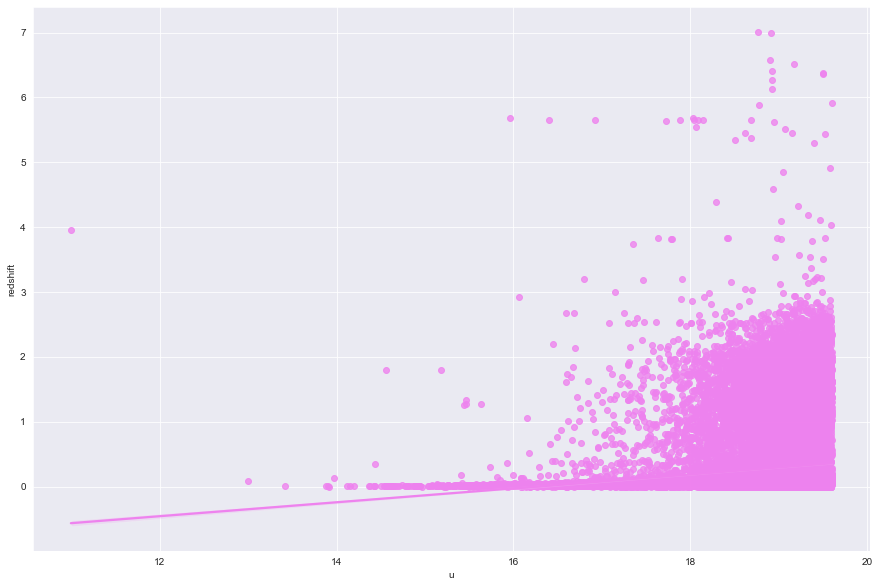

In [41]:
plt.figure(figsize = (15,10))
sb.regplot(u,rs,color = 'violet')

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='g', ylabel='redshift'>

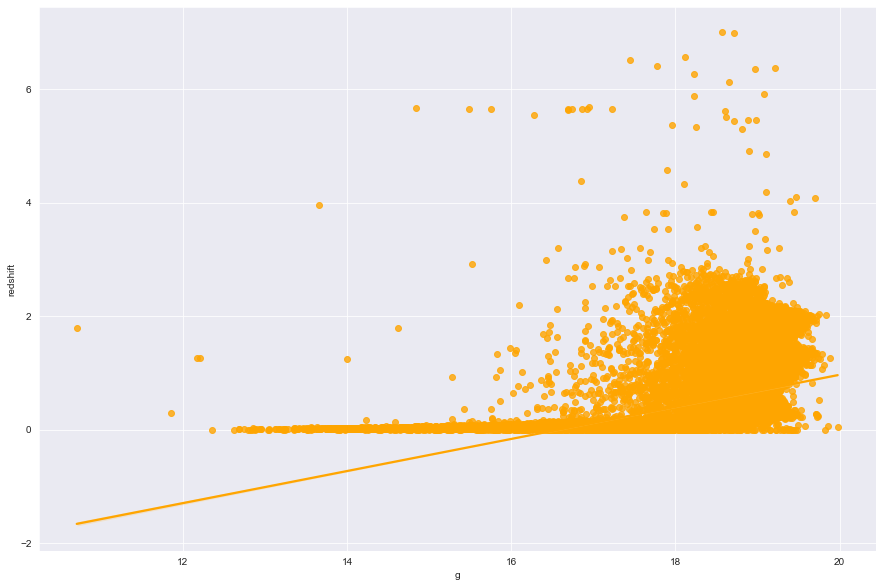

In [42]:
plt.figure(figsize = (15,10))
sb.regplot(g,rs,color = 'orange')

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='z', ylabel='redshift'>

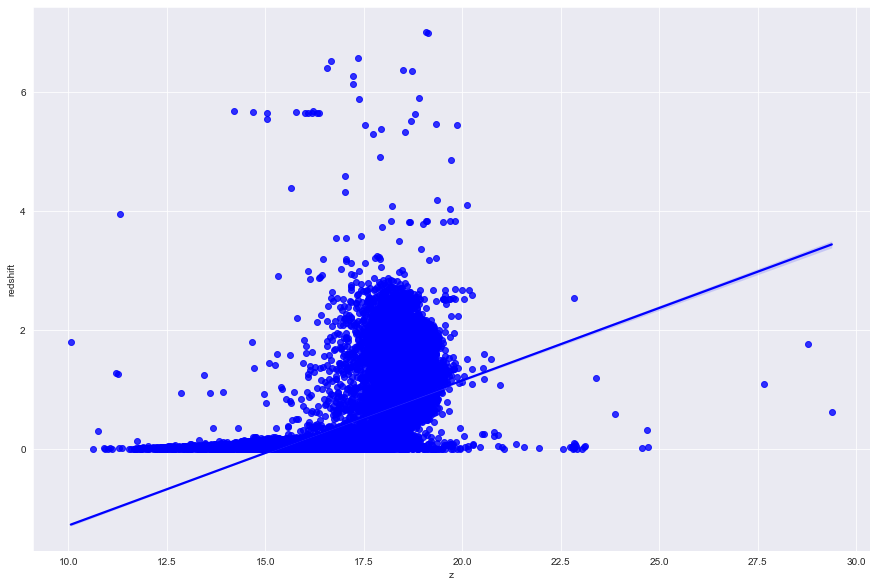

In [43]:
plt.figure(figsize = (15,10))
sb.regplot(z,rs,color = 'blue')

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='i', ylabel='redshift'>

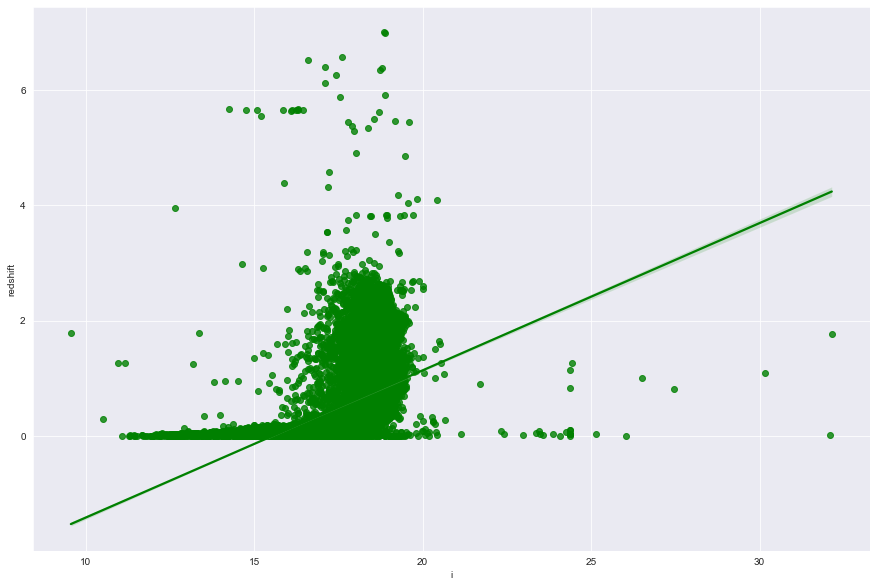

In [44]:
plt.figure(figsize = (15,10))
sb.regplot(i,rs,color = 'green')

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='dec', ylabel='redshift'>

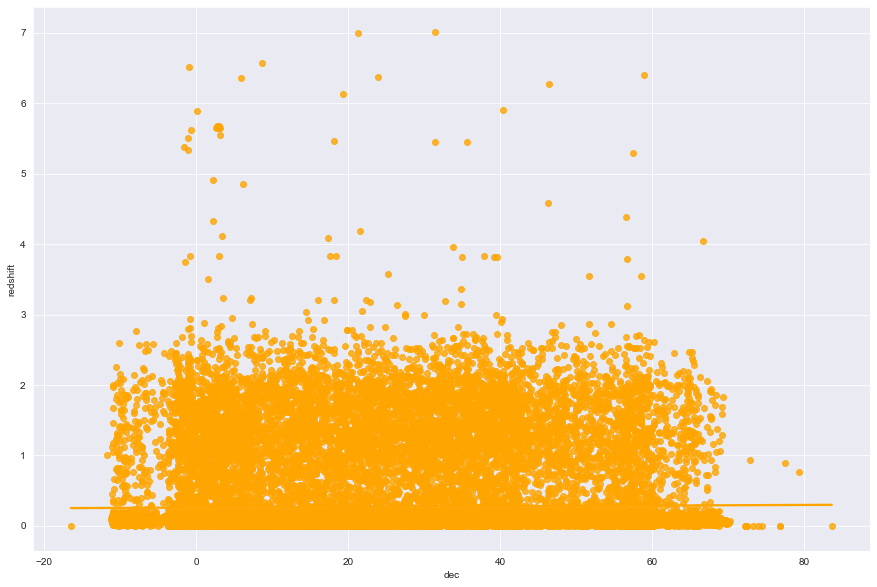

In [45]:
plt.figure(figsize = (15,10))
sb.regplot(dec,rs,color = 'orange')

C:\Users\uma_s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='r', ylabel='redshift'>

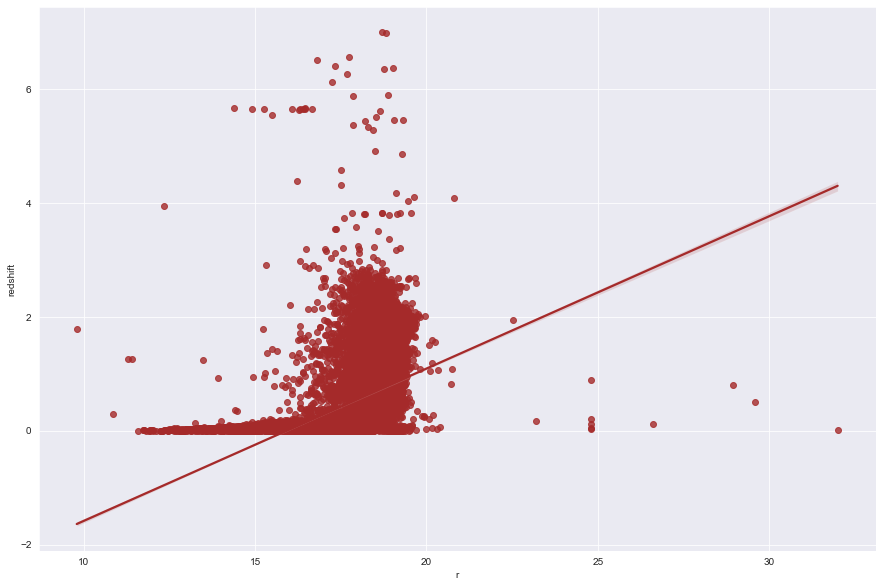

In [46]:
plt.figure(figsize = (15,10))
sb.regplot(r,rs,color = 'brown')